In [105]:
#importing the pandas
import pandas as pd

In [107]:
#lad the data set
data=pd.read_csv(r'netflix dataset.csv')

In [109]:
#view few dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [119]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [121]:
#Find Missing Values
data.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [123]:
# Fill missing values
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Not Provided')
data['country'] = data['country'].fillna('Unknown')
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Not Provided,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [125]:
#Remove Duplicates
data=data.drop_duplicates()


In [127]:
#remove space , convert date into strings
data['date_added'] = data['date_added'].astype(str).str.strip()


In [129]:
#convert into datetime data type
data['date_added']=pd.to_datetime(data['date_added'])
print(data['date_added'].dtype)

datetime64[ns]


In [131]:
#standardize column name
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")


In [133]:
print(data.columns[0:])


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [135]:
print(data.dtypes)


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [137]:

# Fix types
data = data.astype({
    'show_id': 'string',
    'type': 'category',
    'title': 'string',
    'director': 'string',
    'cast': 'string',
    'country': 'category',
    'release_year': 'int64',
    'rating': 'category',
    'duration': 'string',
    'listed_in': 'string',
    'description': 'string'
})
print(data.dtypes)

show_id         string[python]
type                  category
title           string[python]
director        string[python]
cast            string[python]
country               category
date_added      datetime64[ns]
release_year             int64
rating                category
duration        string[python]
listed_in       string[python]
description     string[python]
dtype: object


In [159]:

data=pd.read_csv(r'netflix_cleaned_data.csv')

In [163]:
#analyse data quality
data.isnull().sum()


Unnamed: 0       0
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [185]:
#Fill with a placeholder
data['date_added'] = data['date_added'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Unrated')
data['duration'] = data['duration'].fillna('Unknown')

In [187]:
#again check missing value
data.isnull().sum()

Unnamed: 0      0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [189]:
#check duplicate rows
data.duplicated().sum()


0

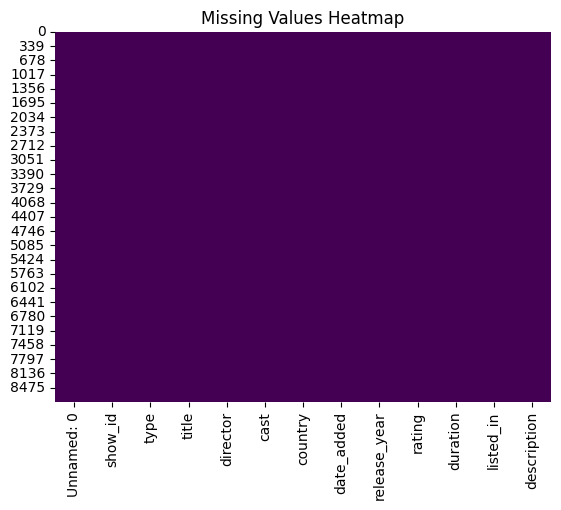

In [193]:
#visualize 
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')  # Null value map
plt.title("Missing Values Heatmap")
plt.show()
